In [1]:
import pandas as pd

Sales data of 12 months spread across 12 excel files are merged into a single file : alldata.csv

In [18]:
total= pd.DataFrame()
filenames = ["Sales_Data/Sales_April_2019.csv", "Sales_Data/Sales_January_2019.csv","Sales_Data/Sales_February_2019.csv","Sales_Data/Sales_March_2019.csv","Sales_Data/Sales_May_2019.csv","Sales_Data/Sales_June_2019.csv","Sales_Data/Sales_July_2019.csv","Sales_Data/Sales_August_2019.csv","Sales_Data/Sales_September_2019.csv","Sales_Data/Sales_October_2019.csv","Sales_Data/Sales_November_2019.csv","Sales_Data/Sales_December_2019.csv"]
for file in filenames:
    df = pd.read_csv(file)
    total = pd.concat([total,df])


In [19]:
total.to_csv("alldata.csv",index=False)
alldata = pd.read_csv("alldata.csv")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
alldata["Month"] = alldata["Order Date"].str[0:2]

Cleaning Data


Extracting month from Order Date

In [21]:
dfnan = alldata[alldata.isna().any(axis=1)]

In [22]:
alldata = alldata[alldata["Month"].str[0:2]!= "Or"]
alldata = alldata.dropna(how ="all")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [23]:
alldata["Month"] = alldata["Month"].astype("int32")

In [24]:
alldata = alldata.reset_index()

Calculating Total price of order

In [25]:
alldata["Quantity Ordered"] = pd.to_numeric(alldata["Quantity Ordered"])
alldata["Price Each"] = pd.to_numeric(alldata["Price Each"])

In [26]:
alldata["Sales"] = alldata["Quantity Ordered"] * alldata["Price Each"]
alldata.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Finding out the month with the highest sales

In [27]:
alldata.groupby("Month").sum()

,index,Quantity Ordered,Price Each,Sales
Month,,,,
1,230787692,10903,1.811768e+06,1.822257e+06
2,408634209,13449,2.188885e+06,2.202022e+06
3,723400701,17005,2.791208e+06,2.807100e+06
4,168700164,20558,3.367671e+06,3.390670e+06
5,1053505243,18667,3.135125e+06,3.152607e+06
6,1067992858,15253,2.562026e+06,2.577802e+06
7,1326344934,16072,2.632540e+06,2.647776e+06
8,1267647171,13448,2.230345e+06,2.244468e+06
9,1369352247,13109,2.084992e+06,2.097560e+06


In [28]:
results = alldata.groupby("Month").sum()

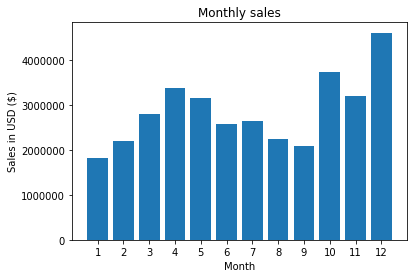

In [30]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results["Sales"])
plt.title("Monthly sales")
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")
plt.show()

December has the highest sales from the visualisation of monthly sales above

Extracting city and state from purchase address to find the city with the highest sales

In [31]:
alldatamod = alldata.copy()
alldatamod["City"] = alldatamod["Purchase Address"].str.split(",").str[1]

In [32]:
alldata["City"] = alldata["Purchase Address"].str.split(",").str[1]

In [33]:
def getcity(address):
      return address.split(",")[1]
    
def getstate(address):
    return address.split(",")[2].split(" ")[1]
    
    
alldata["City"] =  alldata["Purchase Address"].apply(lambda x: getcity(x) + " " + getstate(x))

In [34]:
alldata.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [35]:
results = alldata.groupby("City").sum()
results

,index,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,1385038342,16602,2.779908e+06,104794,2.795499e+06
Austin TX,924606563,11153,1.809874e+06,69829,1.819582e+06
Boston MA,1869301591,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,1390008538,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,2751049428,33289,5.421435e+06,208325,5.452571e+06
New York City NY,2328551705,27932,4.635371e+06,175741,4.664317e+06
Portland ME,226809326,2750,4.471893e+05,17144,4.497583e+05
Portland OR,933362647,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,4174964212,50239,8.211462e+06,315520,8.262204e+06


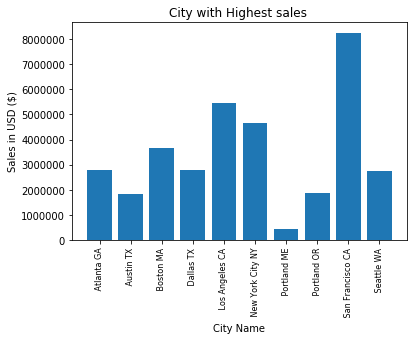

In [36]:
import matplotlib.pyplot as plt
cities = [city for city, df in alldata.groupby("City")]
plt.bar(cities,results["Sales"])
plt.title("City with Highest sales ")
plt.xticks(cities, rotation="vertical", size =8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

Visualisation of data to find the hour with highest sales

In [37]:
alldata["Order Date"] = pd.to_datetime(alldata["Order Date"])

In [38]:
alldata["Hour"] = alldata["Order Date"].dt.hour
alldata["Minute"] = alldata["Order Date"].dt.minute

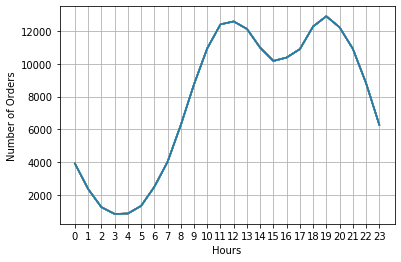

In [39]:
hours = [hour for hour,df in alldata.groupby("Hour")]
plt.plot(hours,alldata.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

Finding which two products are bought together most often

In [40]:
df = alldata[alldata["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

C:\Users\devik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [41]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Finding which product is the most popular

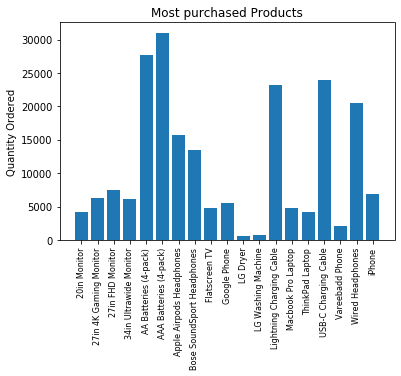

In [43]:
productgroup = alldata.groupby("Product")
quantityordered = productgroup.sum()["Quantity Ordered"]

products = [product for product,df in productgroup]
plt.bar(products,quantityordered)
plt.title("Most purchased Products")
plt.ylabel("Quantity Ordered")
plt.xticks(products,rotation="vertical",size=8)
plt.show()

In [44]:
prices = alldata.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


Drawing a contrast between price and quantity ordered

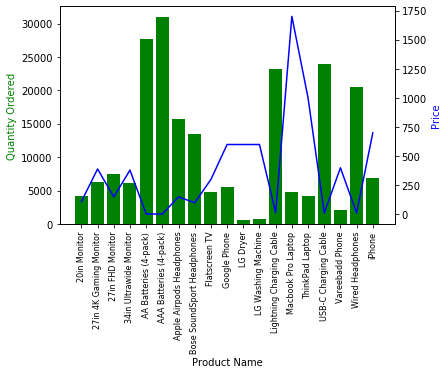

In [46]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantityordered,color="g")
ax2.plot(products,prices,"b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color="g")
ax2.set_ylabel("Price",color="b")
ax1.set_xticklabels(products,rotation="vertical",size=8)

plt.show()

